In [86]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import ticker
base_dir = "/content/drive/MyDrive/NetworkTrafficForecasting2505"

In [88]:
file_name = f"{base_dir}/Data/Abilene-OD_pair.csv"  # the input filename

In [89]:
df = pd.read_csv(file_name)

In [90]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d-%H-%M')  # Parse the time

In [91]:
data_columns = list(df.columns.values)
data_columns.remove('time')
data = df[data_columns].values
df[data_columns] = data

In [92]:
aggregated_time_series = np.sum(data, axis=1)
df_ts = pd.DataFrame()
df_ts['date'] = df['time']
df_ts['data'] = aggregated_time_series / 1000  # Plot in Mbps

<Axes: xlabel='date'>

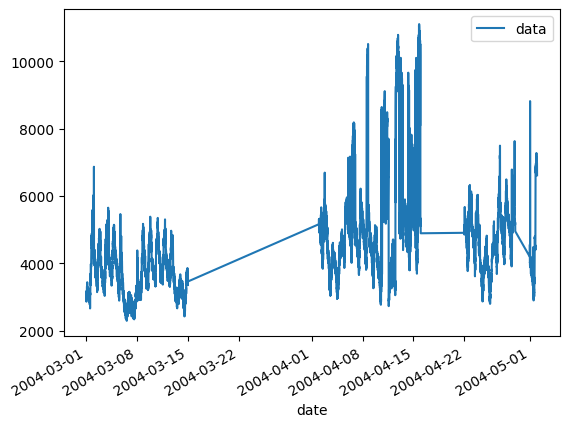

In [94]:
df_ts.set_index("date").loc["2004-03-01":"2004-05-01"].plot()

In [96]:
print(df_ts.isna().sum())

date    0
data    0
dtype: int64


In [81]:
import pandas as pd
import numpy as np
"""
# 計算第 1 百分位和第 99 百分位
lower = df_ts['data'].quantile(0.01)
upper = df_ts['data'].quantile(0.99)

# 找出異常值（小於第 1 百分位或大於第 99 百分位）
outliers = (df_ts['data'] < lower) | (df_ts['data'] > upper)

# 將異常值設為 NaN
df_ts.loc[outliers, 'data'] = np.nan
"""
"""
# 確保 index 是時間格式
if not pd.api.types.is_datetime64_any_dtype(df_ts.index):
    df_ts.index = pd.to_datetime(df_ts.index, errors='coerce')

# 檢查是否有無效的 datetime 轉換（例如 NaT）
df_ts = df_ts[df_ts.index.notna()]"""

"\n# 確保 index 是時間格式\nif not pd.api.types.is_datetime64_any_dtype(df_ts.index):\n    df_ts.index = pd.to_datetime(df_ts.index, errors='coerce')\n\n# 檢查是否有無效的 datetime 轉換（例如 NaT）\ndf_ts = df_ts[df_ts.index.notna()]"

<Axes: xlabel='date'>

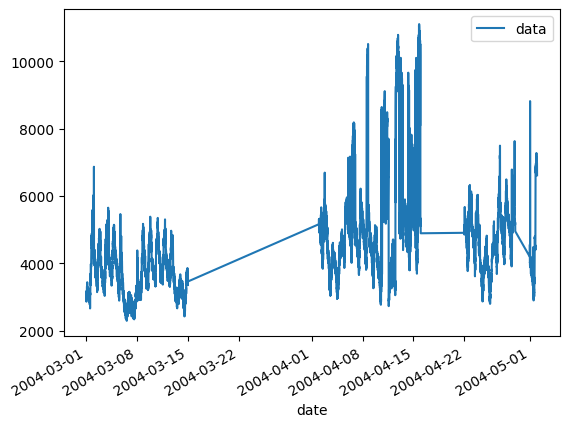

In [82]:
df_ts.set_index("date").loc["2004-03-01":"2004-05-01"].plot()

In [69]:
print(df_ts['data'].isna().sum())

0


In [38]:
df_ts = df_ts.dropna()

In [39]:
df_ts = df_ts.set_index('date')

<Axes: xlabel='date'>

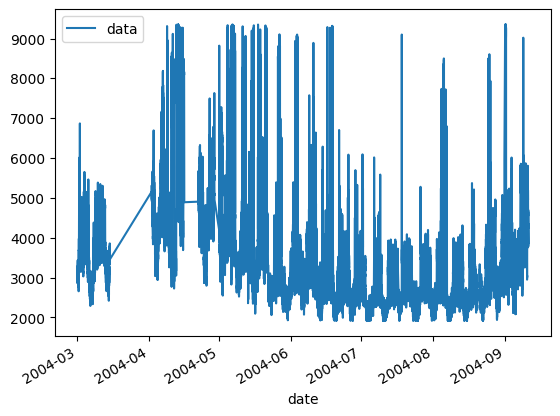

In [40]:
df_ts.plot()

In [196]:
print(np.isnan(df_ts).any(), np.isnan(df_ts).any())


data    False
dtype: bool data    False
dtype: bool


In [159]:
df_ts.to_csv(f"{base_dir}/Processed_Dataset/Abilene_10min.csv")